In [1]:
import mysql.connector
import config

connection = mysql.connector.connect(**config.connection())

In [2]:
def get_data(query):
    '''This function returns the data from the database'''
    cursor = connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    return data

In [3]:
get_data("SHOW DATABASES;")

[('employees',),
 ('information_schema',),
 ('mavenfuzzyfactory',),
 ('mysql',),
 ('performance_schema',),
 ('sys',)]

In [4]:
get_data("USE mavenfuzzyfactory;")

[]

In [5]:
get_data("SHOW TABLES;")

[('order_item_refunds',),
 ('order_items',),
 ('orders',),
 ('products',),
 ('website_pageviews',),
 ('website_sessions',)]

In [27]:
print(get_data('SELECT * FROM mavenfuzzyfactory.orders LIMIT 5;'))

[(1, datetime.datetime(2012, 3, 19, 10, 42, 46), 20, 20, 1, 1, Decimal('49.99'), Decimal('19.49')), (2, datetime.datetime(2012, 3, 19, 19, 27, 37), 104, 104, 1, 1, Decimal('49.99'), Decimal('19.49')), (3, datetime.datetime(2012, 3, 20, 6, 44, 45), 147, 147, 1, 1, Decimal('49.99'), Decimal('19.49')), (4, datetime.datetime(2012, 3, 20, 9, 41, 45), 160, 160, 1, 1, Decimal('49.99'), Decimal('19.49')), (5, datetime.datetime(2012, 3, 20, 11, 28, 15), 177, 177, 1, 1, Decimal('49.99'), Decimal('19.49'))]


In [7]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_sql('SELECT * FROM mavenfuzzyfactory.orders;', con=connection)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/io/sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [9]:
df.head(10)

,order_id,created_at,website_session_id,user_id,primary_product_id,items_purchased,price_usd,cogs_usd
0,1,2012-03-19 10:42:46,20,20,1,1,49.99,19.49
1,2,2012-03-19 19:27:37,104,104,1,1,49.99,19.49
2,3,2012-03-20 06:44:45,147,147,1,1,49.99,19.49
3,4,2012-03-20 09:41:45,160,160,1,1,49.99,19.49
4,5,2012-03-20 11:28:15,177,177,1,1,49.99,19.49
5,6,2012-03-20 16:12:47,232,232,1,1,49.99,19.49
6,7,2012-03-20 17:03:41,241,241,1,1,49.99,19.49
7,8,2012-03-20 23:35:27,295,295,1,1,49.99,19.49
8,9,2012-03-21 02:35:01,304,304,1,1,49.99,19.49
9,10,2012-03-21 06:45:58,317,317,1,1,49.99,19.49


In [10]:
df.price_usd.describe()

count    32313.000000
mean        59.991636
std         17.808771
min         29.990000
25%         49.990000
50%         49.990000
75%         59.990000
max        109.980000
Name: price_usd, dtype: float64

In [20]:
df.describe()

,order_id,website_session_id,user_id,primary_product_id,items_purchased,price_usd,cogs_usd
count,32313.000000,32313.000000,32313.000000,32313.000000,32313.000000,32313.000000,32313.000000
mean,16157.000000,258292.288707,215691.622629,1.392474,1.238666,59.991636,22.355406
std,9328.103961,132427.649842,108402.203189,0.732277,0.426274,17.808771,6.238621
min,1.000000,20.000000,13.000000,1.000000,1.000000,29.990000,9.490000
25%,8079.000000,144828.000000,124135.000000,1.000000,1.000000,49.990000,19.490000
50%,16157.000000,263554.000000,221461.000000,1.000000,1.000000,49.990000,19.490000
75%,24235.000000,374799.000000,310542.000000,2.000000,1.000000,59.990000,22.490000
max,32313.000000,472818.000000,394273.000000,4.000000,2.000000,109.980000,41.980000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32313 entries, 0 to 32312
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            32313 non-null  int64         
 1   created_at          32313 non-null  datetime64[ns]
 2   website_session_id  32313 non-null  int64         
 3   user_id             32313 non-null  int64         
 4   primary_product_id  32313 non-null  int64         
 5   items_purchased     32313 non-null  int64         
 6   price_usd           32313 non-null  float64       
 7   cogs_usd            32313 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 2.0 MB


In [22]:
df.isnull().sum()

order_id              0
created_at            0
website_session_id    0
user_id               0
primary_product_id    0
items_purchased       0
price_usd             0
cogs_usd              0
dtype: int64

In [24]:
df.columns

Index(['order_id', 'created_at', 'website_session_id', 'user_id',
       'primary_product_id', 'items_purchased', 'price_usd', 'cogs_usd'],
      dtype='object')

In [25]:
df.order_id.value_counts()

1        1
21538    1
21551    1
21550    1
21549    1
        ..
10768    1
10767    1
10766    1
10765    1
32313    1
Name: order_id, Length: 32313, dtype: int64

In [26]:
len(df)

32313

<AxesSubplot:ylabel='Frequency'>

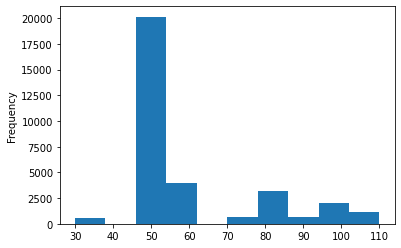

In [11]:
df.price_usd.plot(kind='hist')

In [13]:
import seaborn as sns

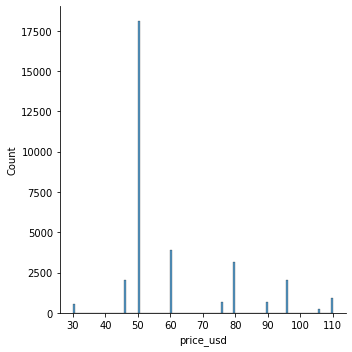

In [14]:
sns.displot(df.price_usd)

<AxesSubplot:xlabel='price_usd', ylabel='Density'>

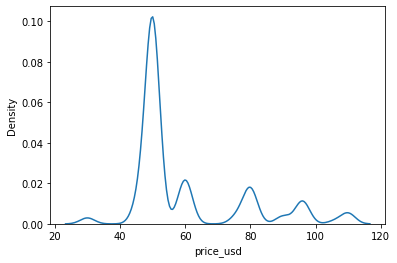

In [15]:
sns.kdeplot(df.price_usd)

<AxesSubplot:>

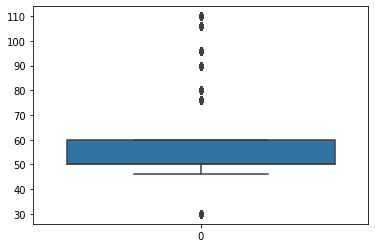

In [18]:
sns.boxplot(data = df.price_usd)

<AxesSubplot:xlabel='price_usd', ylabel='Count'>

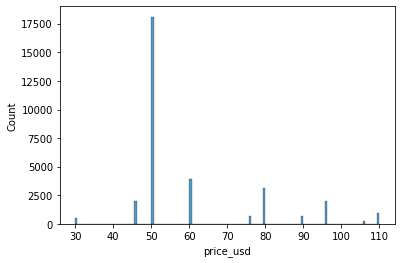

In [19]:
sns.histplot(data = df.price_usd)

TASK 1: see a breakdown of utm source, campaign and referring domain until 2012-04-12

In [30]:
df = pd.read_sql('''
            SELECT
                utm_source, utm_campaign, http_referer,
                COUNT(DISTINCT website_session_id) AS sessions
            FROM website_sessions
            WHERE created_at < '2012-04-12'
            GROUP BY 1, 2, 3
            ORDER BY 4 DESC;

          ''', con=connection)

print(df)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/io/sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


  utm_source utm_campaign             http_referer  sessions
0    gsearch     nonbrand  https://www.gsearch.com      3613
1       None         None                     None        28
2       None         None  https://www.gsearch.com        27
3    gsearch        brand  https://www.gsearch.com        26
4       None         None  https://www.bsearch.com         7
5    bsearch        brand  https://www.bsearch.com         7


In [32]:
conv_rate_df = pd.read_sql(
        '''
             select 
                count(distinct ws.website_session_id) AS sessions, 
                count(distinct o.order_id) as orders,
                count(distinct ws.website_session_id) / count(distinct o.order_id) as session_to_order_conv_rt
            from 
                website_sessions ws
            left join 
                orders o 
            on 
                o.website_session_id = ws.website_session_id 
            where ws.created_at < '2012-04-14' 
            and utm_source = 'gsearch' 
            and utm_campaign = 'nonbrand';

          ''', con=connection)

print(conv_rate_df)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/io/sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


   sessions  orders  session_to_order_conv_rt
0      3895     112                   34.7768
